# <h2 style="color: #fa881eff">🧠💼 Social Network Ads Classification </h2>

# <img src= "https://entail.mayple.com/en-assets/mayple/630cb0a20d194b45e75679b9_socialmediaads1_d3b342f25259d4d267b5d0e682ccc87a_2000-1699775551315.jpg" width="150%" height="400" />

Predicting if a user purchased a product based on Age and Estimated Salary.


### 📌 Workflow
- Data loading & cleaning
- Exploratory Data Analysis (EDA)
- Preprocessing (encoding + scaling)
- Model training (Logistic Regression, SVM)
- Evaluation & saving the best model
---

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [41]:
#Load the Data
df = pd.read_csv('E:\DEPI\DEPI_Projects\Social_Network_Ads\data\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Preprocessing

In [42]:
# Drop User ID (irrelevant)
df.drop('User ID', axis=1, inplace=True)


In [43]:
# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0


In [44]:
# Features & target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']


In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [46]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### EDA

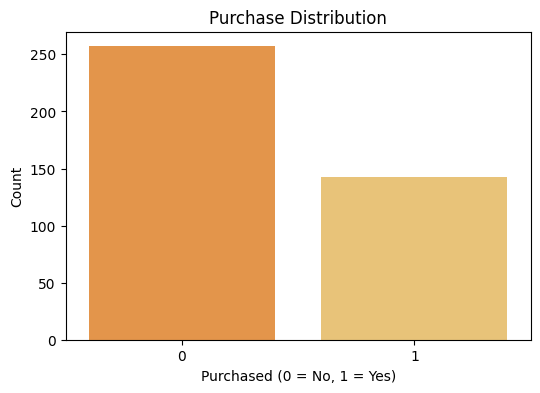

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df, palette=["#fc9432ff","#fbc966ff"])
plt.title("Purchase Distribution")
plt.xlabel("Purchased (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

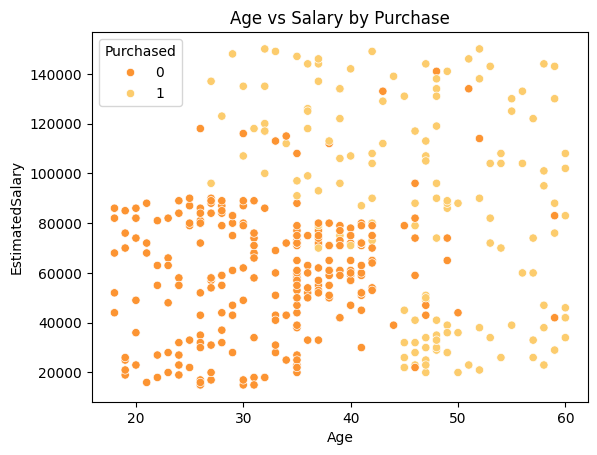

In [55]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette=["#fc9432ff","#fccc6dff"])
plt.title("Age vs Salary by Purchase")
plt.show()

### Model Training & Evaluation

In [35]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear')
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n✅ {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))



✅ Logistic Regression
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.81      0.59      0.68        29

    accuracy                           0.80        80
   macro avg       0.80      0.75      0.77        80
weighted avg       0.80      0.80      0.79        80

[[47  4]
 [12 17]]

✅ Support Vector Machine
Accuracy: 0.7875
              precision    recall  f1-score   support

           0       0.78      0.92      0.85        51
           1       0.80      0.55      0.65        29

    accuracy                           0.79        80
   macro avg       0.79      0.74      0.75        80
weighted avg       0.79      0.79      0.78        80

[[47  4]
 [13 16]]


### Model Comparison

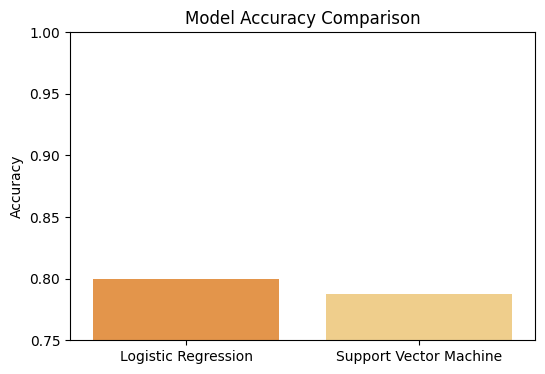

In [57]:
plt.figure(figsize=(6, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette=["#fc9432ff","#ffd37bff"])
plt.title("Model Accuracy Comparison")
plt.ylim(0.75, 1.0)
plt.ylabel("Accuracy")
plt.show()


### Save Best Model

In [37]:
# Choose the better model (e.g., Logistic Regression)
best_model = LogisticRegression()
best_model.fit(X_train_scaled, y_train)

joblib.dump(best_model, '../models/social_model.pkl')
joblib.dump(scaler, '../models/social_scaler.pkl')

print("✅ Model saved as social_model.pkl")
print("✅ Scaler saved as social_scaler.pkl")


✅ Model saved as social_model.pkl
✅ Scaler saved as social_scaler.pkl


### Conclusion
- Built a binary classification model to predict user purchase behavior.
- Logistic Regression performed well and was saved.
- Features like **Age** and **Salary** showed clear impact on decision.
